# Homework 2 Part 2 - Solutions

This is an individual assignment.

---

Write your own code. You may repurpose any functions built during lecture.

---

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

from scipy.stats import multivariate_normal
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, accuracy_score

# Problem 1 (20 points)

**In this problem you will be working with the [handwritten digits](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) from ```scikit-learn```. The dataset contains 1797 samples. Each sample is a 64-dimensional vector representing all pixels of a $8\times 8$ grayscale image of a handwritten digit. There are a total of 10 digits (10 targets) and about 180 images per digit. Let's load the data:**

In [36]:
from sklearn.datasets import load_digits

digits = load_digits(return_X_y=False)

print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [37]:
X = digits.data # training data
t = digits.target # target values

X.shape, t.shape

((1797, 64), (1797,))

**Each image can be reshaped as a $8\times 8$ grayscale image and plotted:**

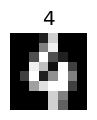

In [38]:
img_no = 100

plt.figure(figsize=(1,1))
plt.imshow(X[img_no,:].reshape(8,8), cmap='gray')
plt.title(t[img_no]) # insert title with the label
plt.axis('off');

**Here's some image examples from all 10 classes:**

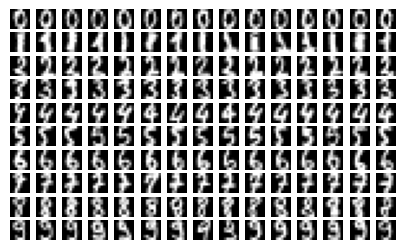

In [39]:
plt.figure(figsize=(5,3))
grid=1
for j in range(10):
    loc = np.where(t==j)[0]
    idx_rd = np.random.choice(loc,15,replace=False)
    for i in range(15):
        plt.subplot(10,15,grid)
        plt.imshow(X[idx_rd[i],:].reshape(8,8), cmap='gray')
        plt.axis('off')
        grid+=1

1. (10 points) **Assume that each class is modeled according to a multivariate Gaussian distribution, $P(\mathbf{x}|C_i)\sim G(\mu_i,\Sigma_i)$. Use MLE approach to estimate the parameters of the data likelihoods. Use your estimated density functions to generate new samples (5 samples) and plot them.**

* **Do the new samples _look_ as expected?**
* **What can you do to improve the results?**

In [ ]:
def generate_samples(X, n, c, s, figsize):
    
    # Printing which class we are working with
    print('Generating samples from class: ', c)
    
    # Parameter estimation with MLE are simply the data averages
    mu  = np.mean(X, axis=0) # sample mean
    sig = np.cov(X.T) # sample covariance
    
    # Create a Gaussian PDF from these estimations
    G = stats.multivariate_normal(mean=mu, cov=sig, allow_singular=True)
    
    # Sample points from this density
    new_samples = G.rvs(size=n)
    
    # Plot them
    plt.figure(figsize=figsize)
    for i in range(n):
        plt.subplot(1,n,i+1)
        plt.imshow(new_samples[i,:].reshape(s,s), cmap='gray')
        plt.axis('off')
    plt.show()
    
#     return new_samples

Generating samples from class:  0


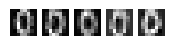

Generating samples from class:  1


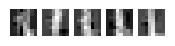

Generating samples from class:  2


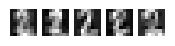

Generating samples from class:  3


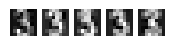

Generating samples from class:  4


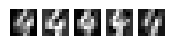

Generating samples from class:  5


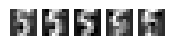

Generating samples from class:  6


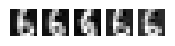

Generating samples from class:  7


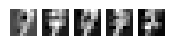

Generating samples from class:  8


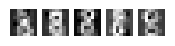

Generating samples from class:  9


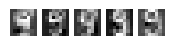

In [40]:
for label in range(10):
    generate_samples(X[t==label,:], 5, label, 8, figsize=(2,1))

In general, the generated samples look like the intended class but there is a lot of smoothness at the boundariesthe digit/s, specially if the the digit can draw in many different ways (such as 8 and 9). For digits that do not vary significantly in the way they are drawn (like digit 0), the generated samples are much *closer* to their expected shape.

Moreover, the assumption that each class is drawn from a multivariate Gaussian (a unimodal distribution) may not be appropriate. We can choose other well-defined distributions or consider a mixture model (sum of weighted distributions). Both these cases are parametric density estimation. Another approach are under non-parametric density functions such as kernel density estimation (or parzen-window density function).

2. (10 points) **Repeat the same exercise for the [Olivetti faces data](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html#sklearn.datasets.fetch_olivetti_faces):**

In [41]:
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces(return_X_y=False)

print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   =====================
    Classes    

In [42]:
data   = faces.data # training data
target = faces.target # target values

data.shape, target.shape

((400, 4096), (400,))

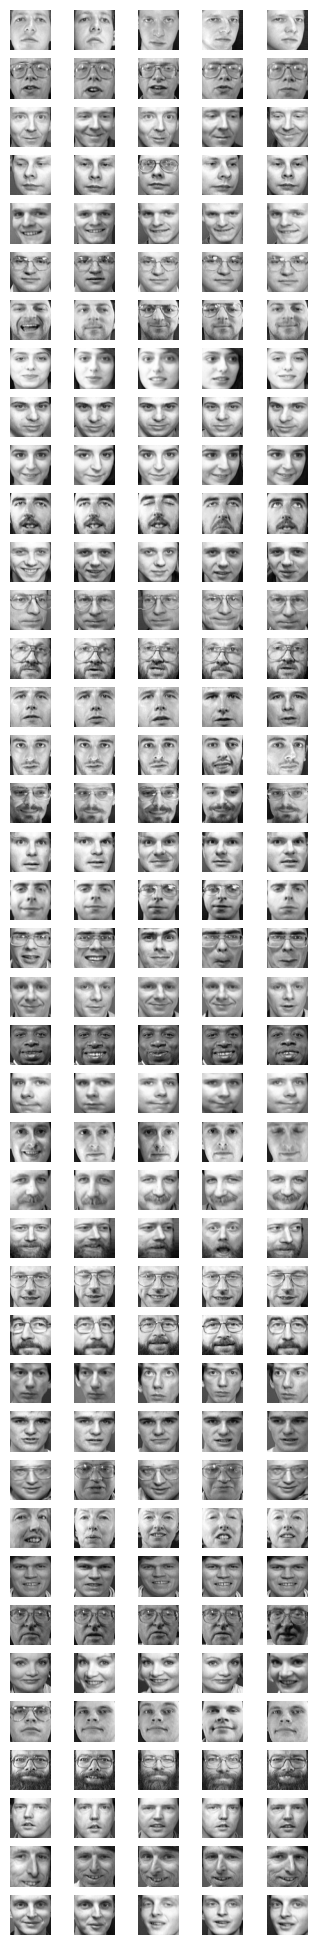

In [43]:
plt.figure(figsize=(4,25))
grid=1
for j in range(40):
    loc = np.where(target==j)[0]
    idx_rd = np.random.choice(loc,5,replace=False)
    for i in range(5):
        plt.subplot(40,5,grid)
        plt.imshow(data[idx_rd[i],:].reshape(64,64), cmap='gray')
        plt.axis('off')
        grid+=1

Generating samples from class:  6


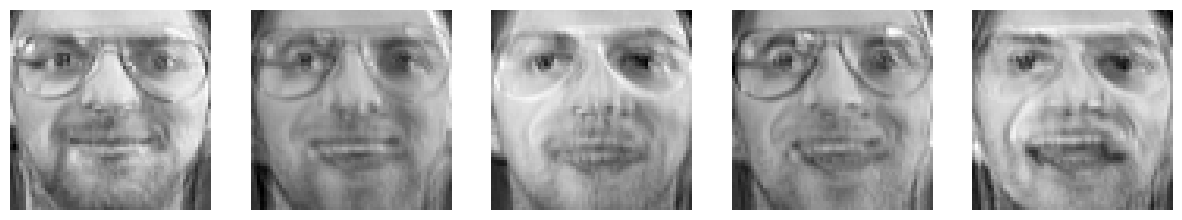

In [47]:
label = 6
generate_samples(data[target==label,:], 5, label, s=64, figsize=(15,5))

In this dataset, each class **only has 10 samples** plus a lot more variability such as face orientation, thus the generated samples under Gaussianity assumption have a lot more distortion compared to the digits dataset.

---

# Problem 2 (25 points)

**In this problem, you will be working with a crab dataset. The dataset contains 200 samples. Each sample is a 7-dimensional vector representing crab attributes (front lip width, rear width, length, width, depth, male and female), namely 5 morphological measurements on 50 crabs each of two color forms and both sexes, of the species *Leptograpsus* variegatus collected at Fremantle, W. Australia.**

* **Dataset Source: Campbell, N.A. and Mahon, R.J. (1974) A multivariate study of variation in two species of rock crab of genus *Leptograpsus*. *Australian Journal of Zoology* 22, 417–425.**

**Let's load the data:**

In [12]:
data = pd.read_csv("crab.txt", delimiter="\t")

data

,Species,FrontalLip,RearWidth,Length,Width,Depth,Male,Female
0,0,20.6,14.4,42.8,46.5,19.6,1,0
1,1,13.3,11.1,27.8,32.3,11.3,1,0
2,0,16.7,14.3,32.3,37.0,14.7,0,1
3,1,9.8,8.9,20.4,23.9,8.8,0,1
4,0,15.6,14.1,31.0,34.5,13.8,0,1
...,...,...,...,...,...,...,...,...
195,1,12.3,11.0,26.8,31.5,11.4,1,0
196,1,12.0,11.1,25.4,29.2,11.0,0,1
197,1,8.8,7.7,18.1,20.8,7.4,1,0
198,1,16.2,15.2,34.5,40.1,13.9,0,1


**The first column corresponds to the class label (crab species) and the other 7 columns correspond to the features. Use the first 140 samples as your training set and the last 60 samples as your test set.**

In [13]:
# Partitioning the data into training and test sets

X_train = data.iloc[:140,1:].to_numpy()
t_train = data.iloc[:140,0].to_numpy()

X_test = data.iloc[140:,1:].to_numpy()
t_test = data.iloc[140:,0].to_numpy()

X_train.shape, X_test.shape, t_train.shape, t_test.shape

((140, 7), (60, 7), (140,), (60,))

**Answer the following questions:**

1. (15 points) **Implement the Naive Bayes classifier, under the assumption that your data likelihood model $p(x|C_j)$ is a multivariate Gaussian and the prior probabilities $p(C_j)$ are dictated by the number of samples $n_j\in\mathbb{R}$ that you have for each class. Build your own code to implement the classifier.**

2. (5 points) **Did you encounter any problems when implementing the probabilistic generative model? What is your solution for the problem? Explain why your solution works. (Note: There is more than one solution.)**

3. (5 points) **Report your classification results in terms of a confusion matrix in both training and test set. (You can use the function ```confusion_matrix``` from the module ```sklearn.metrics```.)**

In [14]:
# This pipeline will apply Standardization to all numerical attributes 
# The attributes that are one-hot/interger-encoded (such as gender) will remain as is

scaling_pipeline = ColumnTransformer([('num_attribs', StandardScaler(), list(range(5)))],
                                    remainder='passthrough')

scaling_pipeline.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('num_attribs', StandardScaler(),
                                 [0, 1, 2, 3, 4])])

In [15]:
X_train = scaling_pipeline.transform(X_train)
X_test = scaling_pipeline.transform(X_test)

### Training the Naive Bayes Classifier - estimating its parameters

In [16]:
# Prior probabilities

pC0 = np.sum(t_train==0)/t_train.size
pC1 = np.sum(t_train==1)/t_train.size

pC0, pC1

(0.5142857142857142, 0.4857142857142857)

In [17]:
# Means and covariances of the data likelihood

mu0 = np.mean(X_train[t_train==0,:],axis=0)
mu1 = np.mean(X_train[t_train==1,:],axis=0)

cov0 = np.cov(X_train[t_train==0,:].T)
cov1 = np.cov(X_train[t_train==1,:].T)

In [18]:
# Training Data Likelihood
y0_train = multivariate_normal.pdf(X_train, mean=mu0, cov=cov0) #P(x|C0)
y1_train = multivariate_normal.pdf(X_train, mean=mu1, cov=cov1) #P(x|C1)

# Test Data Likelihood
y0_test = multivariate_normal.pdf(X_test, mean=mu0, cov=cov0) #P(x|C0)
y1_test = multivariate_normal.pdf(X_test, mean=mu1, cov=cov1) #P(x|C1)

LinAlgError: When `allow_singular is False`, the input matrix must be symmetric positive definite.

Note that if we used all 7 features, the covariance matrix $\Sigma_X$ would be singular. This is because one of the features is colinear with another feature. In particular, features male and female are the complement of one another.

There are 2 ways to address this issue:

1. Eliminate one of the features (method used here)
2. Diagonally-load the covariance matrix: $\Sigma_X + \lambda I$

Either method will be accepted equally. But note that if one decides to use method 2 (diagonally load the covariance matrix), then we have an extra hyperparameter we need to estimate the value for, $\lambda$. It is typically preferred to perform feature selection than distortion the covariance to force it to become full rank (and hence invertible).

## Method 1 - Feature Selection

In this first approach, we simply eliminate the feature/s that are colinear with one another. In this dataset, it is easy for us to see that the features male and female are the complement of one another, knowing if a sample is male, then we know it is not female, and vice-versa. So we can eliminate one of then as keep both is redundant.

But, in practice, sometimes this identification is not straightforwardly visible from the data. But we can measure correlation coefficient between features:

In [19]:
data.corr()

,Species,FrontalLip,RearWidth,Length,Width,Depth,Male,Female
Species,1.000000e+00,-0.437966,-0.315751,-0.288333,-0.216180,-0.423716,-5.052910e-17,2.775558e-17
FrontalLip,-4.379655e-01,1.000000,0.906988,0.978842,0.964956,0.987627,4.330897e-02,-4.330897e-02
RearWidth,-3.157507e-01,0.906988,1.000000,0.892743,0.900402,0.889205,-2.915970e-01,2.915970e-01
Length,-2.883330e-01,0.978842,0.892743,1.000000,0.995023,0.983204,1.049828e-01,-1.049828e-01
Width,-2.161801e-01,0.964956,0.900402,0.995023,1.000000,0.967812,7.443726e-02,-7.443726e-02
Depth,-4.237165e-01,0.987627,0.889205,0.983204,0.967812,1.000000,8.971958e-02,-8.971958e-02
Male,-5.052910e-17,0.043309,-0.291597,0.104983,0.074437,0.089720,1.000000e+00,-1.000000e+00
Female,2.775558e-17,-0.043309,0.291597,-0.104983,-0.074437,-0.089720,-1.000000e+00,1.000000e+00


Now, it is clear that the feature female and male are co-linear.

* We can also see that other features are highly correlated with others (e.g. length-and-width, length-and-depth).
* In practice we can decide to eliminate them or use, for example, Principal Component Analysis (PCA) to decorrelate the features. We will see how to do this later in the course.

In [20]:
# Eliminating the last feature ("female")

X_train = data.iloc[:140,1:7].to_numpy()
X_test = data.iloc[140:,1:7].to_numpy()
t_train = data.iloc[:140,0].to_numpy()
t_test = data.iloc[140:,0].to_numpy()

X_train.shape, X_test.shape, t_train.shape, t_test.shape

((140, 6), (60, 6), (140,), (60,))

In [21]:
scaling_pipeline.fit(X_train)

X_train = scaling_pipeline.transform(X_train)
X_test = scaling_pipeline.transform(X_test)

In [22]:
# Recomputing MLE estimates for mean and covariance

mu0 = np.mean(X_train[t_train==0,:],axis=0)
mu1 = np.mean(X_train[t_train==1,:],axis=0)

cov0 = np.cov(X_train[t_train==0,:].T)
cov1 = np.cov(X_train[t_train==1,:].T)

In [23]:
# Training Data Likelihood
y0_train = multivariate_normal.pdf(X_train, mean=mu0, cov=cov0) #P(x|C0)
y1_train = multivariate_normal.pdf(X_train, mean=mu1, cov=cov1) #P(x|C1)

# Test Data Likelihood
y0_test = multivariate_normal.pdf(X_test, mean=mu0, cov=cov0) #P(x|C0)
y1_test = multivariate_normal.pdf(X_test, mean=mu1, cov=cov1) #P(x|C1)

y0_train.shape, y1_train.shape

((140,), (140,))

In [24]:
# Posterior for Training Data
pos0_train = (y0_train*pC0)/(y0_train*pC0 + y1_train*pC1) # P(C0|x_train) 
pos1_train = (y1_train*pC1)/(y0_train*pC0 + y1_train*pC1) # P(C1|x_train) 
pos_train = np.array([pos0_train, pos1_train]).T # Creating a matrix with posterior probabilities
likelihood_train = np.array([y0_train, y1_train]).T # Creating a matrix with likelihoods

# Posterior for Test Data
pos0_test = (y0_test*pC0)/(y0_test*pC0 + y1_test*pC1) # P(C0|x_test)
pos1_test = (y1_test*pC1)/(y0_test*pC0 + y1_test*pC1) # P(C0|x_test) 
pos_test = np.array([pos0_test, pos1_test]).T # Creating a matrix with posterior probabilities
likelihood_test = np.array([y0_test, y1_test]).T # Creating a matrix with likelihoods

# Prediction for Training Data
predict_train = np.argmax(pos_train, axis=1) # Label prediction for training data
# labels it as the class with largest posterior
predict_likelihood_train = likelihood_train[predict_train] # Likelihood value for the assigned class

# Prediction for Test Data
predict_test = np.argmax(pos_test, axis=1) # Label prediction for test set
predict_likelihood_test = likelihood_train[predict_test] # Likelihood value for the assigned class

In [25]:
print('Confusion matrix in Training')
print(confusion_matrix(t_train, predict_train))

print('Confusion matrix in Test')
print(confusion_matrix(t_test, predict_test))

Confusion matrix in Training
[[72  0]
 [ 0 68]]
Confusion matrix in Test
[[28  0]
 [ 0 32]]


The confusion matrix show that all samples were correctly classified for both training and test sets.

## Method 2 - Diagonally-load the Covariance matrix

Recall the multivariate Gaussian probability density function (PDF):

\begin{align*}
f(\mathbf{x}) = \frac{1}{\sqrt{(2\pi)^d |\Sigma|}} \exp{\left(-\frac{1}{2}(\mathbf{x}-\mathbf{\mu})^T\Sigma^{-1}(\mathbf{x}-\mathbf{\mu})\right)}
\end{align*}

where $\mathbf{x} \in \mathbb{R}^d$ is a data sample, $\mathbf{\mu}\in\mathbb{R}^d$ is the mean vector, $\Sigma$ is the covariance matrix, $|\Sigma|$ is the determinant of the covariance matrix and $\Sigma^{-1}$ is the inverse of the covariance matrix.

In order for us to implement this PDF, the covariance matrix must be invertible (i.e. its determinant must be different than 0). As we saw from before, at least one feature is linearly dependent on another (female and male features), hence the covariance matrix will have dependent column/s, which will make it not full rank, which in turn will produce a determinant of 0 and it is not invertible.

Let's obtain the original data (in the 7-dimensional space):

In [26]:
# Partitioning the data into training and test sets

X_train = data.iloc[:140,1:].to_numpy()
t_train = data.iloc[:140,0].to_numpy()

X_test = data.iloc[140:,1:].to_numpy()
t_test = data.iloc[140:,0].to_numpy()

X_train.shape, X_test.shape, t_train.shape, t_test.shape

((140, 7), (60, 7), (140,), (60,))

In [27]:
scaling_pipeline.fit(X_train)

X_train = scaling_pipeline.transform(X_train)
X_test = scaling_pipeline.transform(X_test)

In [28]:
# Visualize the covariance matrix for the training data

pd.DataFrame(np.cov(X_train.T))

,0,1,2,3,4,5,6
0,1.007194,0.922772,0.984102,0.968550,0.995087,0.015013,-0.015013
1,0.922772,1.007194,0.900605,0.905846,0.904054,-0.146339,0.146339
2,0.984102,0.900605,1.007194,1.001785,0.989244,0.050729,-0.050729
3,0.968550,0.905846,1.001785,1.007194,0.972557,0.034288,-0.034288
4,0.995087,0.904054,0.989244,0.972557,1.007194,0.039355,-0.039355
5,0.015013,-0.146339,0.050729,0.034288,0.039355,0.251593,-0.251593
6,-0.015013,0.146339,-0.050729,-0.034288,-0.039355,-0.251593,0.251593


As you can see the last two columns are linearly dependent.

In [29]:
# Prior probabilities

pC0 = np.sum(t_train==0)/t_train.size
pC1 = np.sum(t_train==1)/t_train.size

pC0, pC1

(0.5142857142857142, 0.4857142857142857)

In [30]:
# Means and covariances of the data likelihood

mu0 = np.mean(X_train[t_train==0,:],axis=0)
mu1 = np.mean(X_train[t_train==1,:],axis=0)

cov0 = np.cov(X_train[t_train==0,:].T)
cov1 = np.cov(X_train[t_train==1,:].T)

Now, let's diagonally-load the covariance before computing the data likelihood for each class, that is:

\begin{align*}
\mathbf{\Sigma} \leftarrow \mathbf{\Sigma} + \lambda \mathbf{I}
\end{align*}

where $\lambda$ is a (constant) hyperparameter that must be learned using cross-validation for the training data. I am not going to include that step here but you should implement CV when utilizing this approaches in your research projects.

In [31]:
# Diagonally-loading covariance matrices -- injecting small value along the diagonal of the covariance. 
# this forces it to be full rank, and hence invertible.

reg = 0.0001 # this is a tunable parameter, that must be learned using cross-validation

cov0_reg = cov0 + reg*np.eye(len(cov0))

cov1_reg = cov1 + reg*np.eye(len(cov1))

In [32]:
# Training Data Likelihood
y0_train = multivariate_normal.pdf(X_train, mean=mu0, cov=cov0_reg) #P(x|C0)
y1_train = multivariate_normal.pdf(X_train, mean=mu1, cov=cov1_reg) #P(x|C1)

# Test Data Likelihood
y0_test = multivariate_normal.pdf(X_test, mean=mu0, cov=cov0_reg) #P(x|C0)
y1_test = multivariate_normal.pdf(X_test, mean=mu1, cov=cov1_reg) #P(x|C1)

No *singular* error message this time!

In [33]:
# Posterior for Training Data
pos0_train = (y0_train*pC0)/(y0_train*pC0 + y1_train*pC1) # P(C0|x_train) 
pos1_train = (y1_train*pC1)/(y0_train*pC0 + y1_train*pC1) # P(C1|x_train) 
pos_train = np.array([pos0_train, pos1_train]).T # Creating a matrix with posterior probabilities
likelihood_train = np.array([y0_train, y1_train]).T # Creating a matrix with likelihoods

# Posterior for Test Data
pos0_test = (y0_test*pC0)/(y0_test*pC0 + y1_test*pC1) # P(C0|x_test)
pos1_test = (y1_test*pC1)/(y0_test*pC0 + y1_test*pC1) # P(C0|x_test) 
pos_test = np.array([pos0_test, pos1_test]).T # Creating a matrix with posterior probabilities
likelihood_test = np.array([y0_test, y1_test]).T # Creating a matrix with likelihoods

# Prediction for Training Data
predict_train = np.argmax(pos_train, axis=1) # Label prediction for training data
# labels it as the class with largest posterior
predict_likelihood_train = likelihood_train[predict_train] # Likelihood value for the assigned class

# Prediction for Test Data
predict_test = np.argmax(pos_test, axis=1) # Label prediction for test set
predict_likelihood_test = likelihood_train[predict_test] # Likelihood value for the assigned class

In [34]:
print('Confusion matrix in Training')
print(confusion_matrix(t_train, predict_train))

print('Confusion matrix in Test')
print(confusion_matrix(t_test, predict_test))

Confusion matrix in Training
[[72  0]
 [ 0 68]]
Confusion matrix in Test
[[28  0]
 [ 0 32]]


The confusion matrix show that all samples were correctly classified for both training and test sets.

Note that if you go back, and use a very large value for $\lambda$, say $\lambda=10$, the confusion matrices will display a lot more errors. This large regularizer will distort the data significantly to impact the classification results.

---

# On-Time (5 points)

Submit your assignment before the deadline.

___

# Submit Your Solution

Confirm that you've successfully completed the assignment.

Along with the Notebook, include a PDF of the notebook with your solutions.

```add``` and ```commit``` the final version of your work, and ```push``` your code to your GitHub repository.

Submit the URL of your GitHub Repository as your assignment submission on Canvas.

___